In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import sqlite3
import textwrap
import dash
from dash import dcc, html, Input, Output

file_path = r"C:\Users\info\Desktop\project3team11\Resources\final2_cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Define your SQLite database path
db_file = r"C:\Users\info\Desktop\project3team11\Resources\DW_cleaned_data.db"

# Connect to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect(db_file)
cursor = conn.cursor()


# Define the table schema based on the dataset columns
cursor.execute('''
CREATE TABLE IF NOT EXISTS health_data (
    Year INTEGER,
    Sex TEXT,
    Age TEXT,
    Grade TEXT,
    Race_Ethnicity TEXT,
    DataSource TEXT,
    Location TEXT,
    LocationID TEXT,
    LocationID_1 INTEGER,
    Geolocation TEXT,
    Topic TEXT,
    TopicID TEXT,
    Question TEXT,
    QuestionID TEXT,
    Value REAL,
    DataValueUnit TEXT,
    DataValueType TEXT,
    DataValueTypeID TEXT,
    LowConfidenceLimit REAL,
    HighConfidenceLimit REAL
)
''')

# Commit the table creation
conn.commit()

# Load data from the DataFrame into the SQLite table
data.to_sql('health_data', conn, if_exists='replace', index=False)

# Confirm data insertion by querying the database
row_count = cursor.execute('SELECT COUNT(*) FROM health_data').fetchone()[0]
print(f"Rows inserted into the database: {row_count}")


Rows inserted into the database: 309215


In [6]:
print(data.columns)



Index(['Year', 'Sex', 'Age', 'Grade', 'Race/Ethnicity', 'DataSource',
       'Location', 'LocationAbbr', 'LocationID', 'Geolocation', 'Longitude',
       'Latitude', 'Topic', 'TopicID', 'Question', 'QuestionID', 'Value',
       'DataValueUnit', 'DataValueType', 'DataValueTypeID',
       'LowConfidenceLimit', 'HighConfidenceLimit'],
      dtype='object')


In [7]:
print(data['Topic'].unique())  # Shows unique topics in the dataset


['Social Determinants of Health' 'Alcohol' 'Tobacco' 'Immunization'
 'Arthritis' 'Mental Health' 'Health Status'
 'Nutrition, Physical Activity, and Weight Status'
 'Chronic Obstructive Pulmonary Disease' 'Diabetes' 'Asthma'
 'Cardiovascular Disease' 'Cognitive Health and Caregiving' 'Disability'
 'Cancer' 'Oral Health' 'Sleep' 'Maternal Health' 'Chronic Kidney Disease']


In [8]:
# Calculate the mode for the 'Topic' column
topic_mode = data['Topic'].mode()[0]

print("The mode for the 'Topic' column is:", topic_mode)

The mode for the 'Topic' column is: Cardiovascular Disease


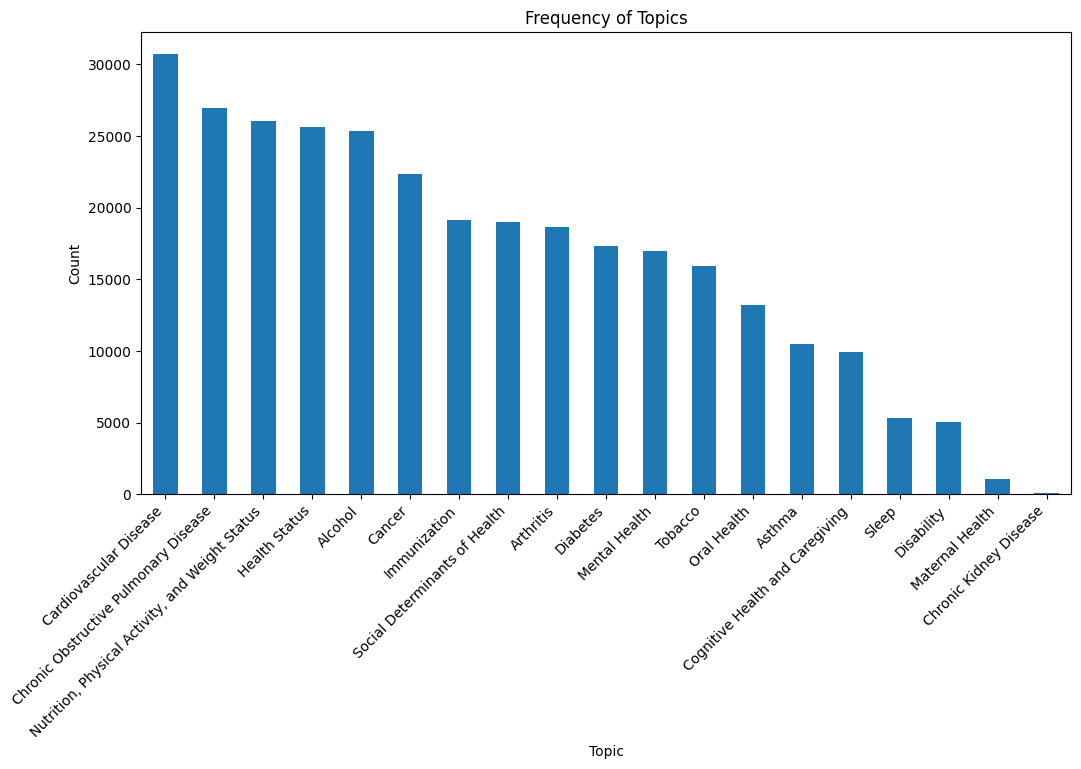

In [9]:
topic_counts = data['Topic'].value_counts()
topic_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()

In [10]:
print(data['Question'].unique())  # Shows unique questions related to the data

['High school completion among adults aged 18-24'
 'Unemployment rate among people 16 years and older in the labor force'
 'Living below 150% of the poverty threshold among all people'
 'No broadband internet subscription among households'
 'Per capita alcohol consumption among people aged 14 years and older'
 'Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars'
 'Pneumococcal vaccination among adults aged 65 years and older'
 'Physical inactivity among adults with arthritis'
 'Influenza vaccination among adults 18â€“64 who are at increased risk'
 'Average mentally unhealthy days among adults'
 'Binge drinking frequency among adults who binge drink'
 'Binge drinking prevalence among adults' 'Depression among adults'
 'Frequent physical distress among adults'
 'Influenza vaccination among adults'
 'Received health care provider counseling for physical activity

In [11]:
print(data['QuestionID'].unique())  # Shows unique questions related to the data

['SDH02' 'SDH08' 'SDH01' 'SDH03' 'ALC08' 'TOB07' 'IMM04' 'ART05' 'IMM02'
 'MEN04' 'ALC04' 'ALC06' 'MEN02' 'HEA03' 'IMM01' 'ART06' 'NPW14' 'COPD02'
 'HEA01' 'ALC05' 'NPW04' 'ART03' 'DIA01' 'AST02' 'HEA02' 'SDH12' 'NPW06'
 'TOB04' 'NPW02' 'MEN05' 'CVD01' 'SDH09' 'CHC01' 'CHC04' 'CVD04' 'DIS01'
 'CVD02' 'COPD01' 'ART02' 'HEA04' 'HEA05' 'CVD03' 'TOB06' 'ART07' 'IMM03'
 'ART01' 'ART04' 'CHC03' 'CHC02' 'CAN06' 'ORH02' 'CAN10' 'ORH06' 'ORH01'
 'CAN09' 'ORH03' 'SLP03' 'SDH07' 'SDH05' 'SDH06' 'NPW09' 'COPD04' 'COPD03'
 'CVD06' 'SDH04' 'NPW10' 'NPW11' 'ORH05' 'SLP01' 'NPW07' 'ORH04' 'AST01'
 'COPD06' 'ALC09' 'CVD09' 'CVD07' 'DIA03' 'DIA04' 'COPD05' 'CVD08' 'HEA06'
 'MEN03' 'TOB05' 'DIA02' 'ORH07' 'SDH11' 'MAT01' 'SDH10' 'CAN05' 'CAN04'
 'CAN02' 'CAN01' 'CAN08' 'CAN03' 'CAN07' 'CKD01' 'NPW12' 'TOB02' 'NPW01'
 'ALC01' 'SLP02' 'NPW03' 'ALC07' 'NPW08' 'TOB03' 'TOB01' 'NPW13' 'NPW05'
 'MEN01']


In [12]:
# Clean the dataset (ensure numeric values in Value column)
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')  # Convert Value column to numeric
data = data.dropna(subset=['Value'])  # Remove rows with missing values in Value

# Aggregate data to remove duplicates
aggregated_data = data.groupby(['Year', 'Topic'], as_index=False).agg({'Value': 'mean'})
print("Aggregated Data:")
print(aggregated_data.head())
print(aggregated_data.shape)

# Pivot the dataset
pivoted_data = aggregated_data.pivot(index='Year', columns='Topic', values='Value')
print("Pivoted Data:")
print(pivoted_data.head())
print(pivoted_data.shape)

# Check for missing values in pivoted data
pivoted_data = pivoted_data.fillna(0)  # Fill missing values with 0

# Compute correlations
correlations = pivoted_data.corr()
print("Correlation Matrix:")
print(correlations)



Aggregated Data:
   Year                   Topic        Value
0  2019                 Alcohol    83.206742
1  2019               Arthritis    33.048481
2  2019                  Asthma    25.138099
3  2019                  Cancer  2202.719539
4  2019  Cardiovascular Disease  1638.525750
(67, 3)
Pivoted Data:
Topic     Alcohol  Arthritis     Asthma       Cancer  Cardiovascular Disease  \
Year                                                                           
2019    83.206742  33.048481  25.138099  2202.719539             1638.525750   
2020   117.925678        NaN  27.684740  1798.138743             2685.483736   
2021   103.008165  31.644240  25.200346          NaN             1601.739159   
2022     9.070506  26.764120  11.271670    60.236407                     NaN   

Topic  Chronic Kidney Disease  Chronic Obstructive Pulmonary Disease  \
Year                                                                   
2019              2702.197115                            3923.5995

In [13]:
# Check the schema of the table
query = "PRAGMA table_info(health_data)"
table_info = conn.execute(query).fetchall()

# Print the table schema
for column in table_info:
    print(column)

(0, 'Year', 'INTEGER', 0, None, 0)
(1, 'Sex', 'TEXT', 0, None, 0)
(2, 'Age', 'TEXT', 0, None, 0)
(3, 'Grade', 'TEXT', 0, None, 0)
(4, 'Race/Ethnicity', 'TEXT', 0, None, 0)
(5, 'DataSource', 'TEXT', 0, None, 0)
(6, 'Location', 'TEXT', 0, None, 0)
(7, 'LocationAbbr', 'TEXT', 0, None, 0)
(8, 'LocationID', 'INTEGER', 0, None, 0)
(9, 'Geolocation', 'TEXT', 0, None, 0)
(10, 'Longitude', 'REAL', 0, None, 0)
(11, 'Latitude', 'REAL', 0, None, 0)
(12, 'Topic', 'TEXT', 0, None, 0)
(13, 'TopicID', 'TEXT', 0, None, 0)
(14, 'Question', 'TEXT', 0, None, 0)
(15, 'QuestionID', 'TEXT', 0, None, 0)
(16, 'Value', 'REAL', 0, None, 0)
(17, 'DataValueUnit', 'TEXT', 0, None, 0)
(18, 'DataValueType', 'TEXT', 0, None, 0)
(19, 'DataValueTypeID', 'TEXT', 0, None, 0)
(20, 'LowConfidenceLimit', 'REAL', 0, None, 0)
(21, 'HighConfidenceLimit', 'REAL', 0, None, 0)


In [14]:
import sqlite3

# Define the database file path
db_file = r"C:\Users\info\Desktop\project3team11\Resources\DW_cleaned_data.db"

# Connect to the database and fetch table names
conn = sqlite3.connect(db_file)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
conn.close()

print("Available Tables:", tables)


Available Tables: [('health_data',)]


DASH LIFESTYLE INTERACTIVE VISUALS

In [ ]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import sqlite3
import textwrap

# Define your SQLite database path
db_file = r"C:\Users\info\Desktop\project3team11\Resources\DW_cleaned_data.db"

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Health Measures Dashboard"

# Connect to SQLite and load unique options for dropdowns
conn = sqlite3.connect(db_file)
topics = pd.read_sql_query('SELECT DISTINCT Topic FROM health_data', conn)['Topic'].tolist()
locations = pd.read_sql_query('SELECT DISTINCT Location FROM health_data', conn)['Location'].tolist()
years = pd.read_sql_query('SELECT DISTINCT Year FROM health_data', conn)['Year'].sort_values().tolist()
sexes = ['All'] + pd.read_sql_query('SELECT DISTINCT Sex FROM health_data', conn)['Sex'].tolist()
ages = ['All'] + pd.read_sql_query('SELECT DISTINCT Age FROM health_data', conn)['Age'].tolist()
races = ['All'] + pd.read_sql_query('SELECT DISTINCT "Race/Ethnicity" FROM health_data', conn)['Race/Ethnicity'].tolist()
conn.close()

# Define the app layout
app.layout = html.Div(style={"backgroundColor": "#f9f9f9", "fontFamily": "Arial, sans-serif", "padding": "20px"}, children=[
    # App Title
    html.H1("Interactive Health Measures Dashboard", style={
        "textAlign": "center",
        "color": "#2c3e50",
        "fontWeight": "bold",
        "fontSize": "36px",
        "marginBottom": "10px"
    }),

    # Introduction Section
    html.Div([
        html.H3("Project 11 Team 3", style={"textAlign": "center", "color": "#2c3e50", "fontWeight": "bold"}),
        html.P(
            "Healthy Living, Diverse Challenges: Exploring Health Trends by Topic and Region",
            style={"textAlign": "center", "color": "#34495e", "fontSize": "18px", "marginBottom": "10px"}
        ),
        html.P(
            "This dashboard empowers users to uncover key health trends by exploring topics, regions," 
            "and demographics. Dive into interactive visualizations to identify patterns, reveal insights," 
            "and better understand the relationships between chronic diseases, health risks," 
            "and social determinants. Our mission: Make data-driven decision-making accessible" 
            "and impactful for all.",
            style={"textAlign": "center", "color": "#34495e", "fontSize": "16px", "marginBottom": "20px"}
        )
    ], style={"marginBottom": "30px"}),

    # Filters Section
    html.Div([
        html.Label("Select Topic:", style={"fontWeight": "bold", "color": "#2c3e50"}),
        dcc.Dropdown(id="topic-dropdown", options=[{"label": t, "value": t} for t in topics], value=topics[0]),
        html.Label("Select Location:", style={"fontWeight": "bold", "color": "#2c3e50"}),
        dcc.Dropdown(id="location-dropdown", options=[{"label": l, "value": l} for l in locations], value=locations[0]),
        html.Label("Select Year:", style={"fontWeight": "bold", "color": "#2c3e50"}),
        dcc.Slider(id="year-slider", min=min(years), max=max(years), step=1, value=min(years),
                   marks={year: str(year) for year in years})
    ], style={"width": "50%", "margin": "auto", "padding": "20px", "border": "1px solid #ddd", "borderRadius": "10px", "backgroundColor": "#ffffff"}),

    # Demographic Filters Section
    html.Div([
        html.Label("Select Sex:", style={"fontWeight": "bold", "color": "#2c3e50"}),
        dcc.Dropdown(id="sex-dropdown", options=[{"label": s, "value": s} for s in sexes], value='All'),
        html.Label("Select Age:", style={"fontWeight": "bold", "color": "#2c3e50"}),
        dcc.Dropdown(id="age-dropdown", options=[{"label": a, "value": a} for a in ages], value='All'),
        html.Label("Select Race/Ethnicity:", style={"fontWeight": "bold", "color": "#2c3e50"}),
        dcc.Dropdown(id="race-dropdown", options=[{"label": r, "value": r} for r in races], value='All')
    ], style={"width": "50%", "margin": "auto", "padding": "20px", "border": "1px solid #ddd", "borderRadius": "10px", "backgroundColor": "#ffffff", "marginTop": "20px"}),

    # Graphs Section
    dcc.Graph(id="bar-chart"),
    dcc.Graph(id="choropleth-map"),
    dcc.Graph(id="line-chart"),
    dcc.Graph(id="scatter-plot"),
    dcc.Graph(id="top-questions-chart")
])

# Define callback to update visuals
@app.callback(
    Output("bar-chart", "figure"),
    Output("choropleth-map", "figure"),
    Output("line-chart", "figure"),
    Output("scatter-plot", "figure"),
    Output("top-questions-chart", "figure"),
    Input("topic-dropdown", "value"),
    Input("location-dropdown", "value"),
    Input("year-slider", "value"),
    Input("sex-dropdown", "value"),
    Input("age-dropdown", "value"),
    Input("race-dropdown", "value")
)
def update_visuals(selected_topic, selected_location, selected_year, selected_sex, selected_age, selected_race):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_file)

    # Build a base query
    query = f'''
    SELECT * FROM health_data
    WHERE Topic = "{selected_topic}" 
    AND Location = "{selected_location}" 
    AND Year = {selected_year}
    '''
    
    # Add demographic filters to the query
    if selected_sex != 'All':
        query += f' AND Sex = "{selected_sex}"'
    if selected_age != 'All':
        query += f' AND Age = "{selected_age}"'
    if selected_race != 'All':
        query += f' AND "Race/Ethnicity" = "{selected_race}"'

    # Query the database
    data = pd.read_sql_query(query, conn)

    # Query for trends over time
    trend_query = f'''
    SELECT Year, AVG(Value) as AvgValue FROM health_data
    WHERE Topic = "{selected_topic}" AND Location = "{selected_location}"
    '''
    if selected_sex != 'All':
        trend_query += f' AND Sex = "{selected_sex}"'
    if selected_age != 'All':
        trend_query += f' AND Age = "{selected_age}"'
    if selected_race != 'All':
        trend_query += f' AND "Race/Ethnicity" = "{selected_race}"'
    trend_query += " GROUP BY Year"
    trend_data = pd.read_sql_query(trend_query, conn)

    # Query for top 10 questions
    top_questions_query = f'''
    SELECT Question, AVG(Value) as AvgValue FROM health_data
    WHERE Topic = "{selected_topic}"
    GROUP BY Question
    ORDER BY AvgValue DESC
    LIMIT 10
    '''
    top_questions_data = pd.read_sql_query(top_questions_query, conn)

    # Add line breaks to long question labels
    top_questions_data['Question'] = top_questions_data['Question'].apply(
        lambda q: "<br>".join(textwrap.wrap(q, width=40))
    )

    conn.close()

    # Create Visuals
    # Bar Chart
    bar_fig = px.bar(data, x="Question", y="Value", title=f"Bar Chart for {selected_topic} in {selected_location} ({selected_year})")
    bar_fig.update_layout(
        title={"x": 0.5, "font": {"size": 24, "color": "#2c3e50"}},
        plot_bgcolor="#f9f9f9", paper_bgcolor="#ffffff",
        font={"family": "Arial", "color": "#2c3e50"}
    )

    # Choropleth Map
    map_fig = px.choropleth(data, locations="LocationID", locationmode="USA-states", color="Value",
                            title="Geographic Distribution of Measures")
    map_fig.update_layout(
        title={"x": 0.5, "font": {"size": 24, "color": "#2c3e50"}},
        geo=dict(bgcolor="#f9f9f9"),
        paper_bgcolor="#ffffff",
        font={"family": "Arial", "color": "#2c3e50"}
    )

    # Line Chart
    line_fig = px.line(trend_data, x="Year", y="AvgValue", title=f"Trends for {selected_topic} in {selected_location}")
    line_fig.update_layout(
        title={"x": 0.5, "font": {"size": 24, "color": "#2c3e50"}},
        plot_bgcolor="#f9f9f9", paper_bgcolor="#ffffff",
        font={"family": "Arial", "color": "#2c3e50"}
    )

    # Scatterplot
    scatter_fig = px.scatter(data, x="LowConfidenceLimit", y="HighConfidenceLimit",
                              title="Correlation Between Confidence Limits")
    scatter_fig.update_layout(
        title={"x": 0.5, "font": {"size": 24, "color": "#2c3e50"}},
        plot_bgcolor="#f9f9f9", paper_bgcolor="#ffffff",
        font={"family": "Arial", "color": "#2c3e50"}
    )

    # Top 10 Questions Chart with Multi-Line Labels
    top_questions_fig = px.bar(
        top_questions_data,
        x="Question",
        y="AvgValue",
        title=f"Top 10 Questions for {selected_topic}",
        labels={"Question": "Questions", "AvgValue": "Average Value"}
    )
    top_questions_fig.update_layout(
        title={"x": 0.5, "font": {"size": 24, "color": "#2c3e50"}},
        xaxis={"title": "Questions", "titlefont": {"size": 18, "color": "#34495e"}},
        yaxis={"title": "Average Value", "titlefont": {"size": 18, "color": "#34495e"}},
        plot_bgcolor="#f9f9f9",
        paper_bgcolor="#ffffff",
        font={"family": "Arial", "color": "#2c3e50"}
    )

    return bar_fig, map_fig, line_fig, scatter_fig, top_questions_fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[15], line 152, in update_visuals(
    selected_topic='Social Determinants of Health',
    selected_location='California',
    selected_year=2019,
    selected_sex='All',
    selected_age='All',
    selected_race='All'
)
    148 conn.close()
    150 # Create Visuals
    151 # Bar Chart
--> 152 bar_fig = px.bar(data, x="Question", y="Value", title=f"Bar Chart for {selected_topic} in {selected_location} ({selected_year})")
        data =     Year      Sex        Age    Grade             Race/Ethnicity DataSource  \
0   2019  Unknown    Unknown  Unknown                   Hispanic        ACS   
1   2019  Unknown    Unknown  Unknown        Black, non-Hispanic        ACS   
2   2019  Unknown    Unknown  Unknown                    Unknown        ACS   
3   2019  Unknown    Unknown  Unknown                    Unknown        ACS   
4   20